### Datajoint Local troubleshooting notebook

In [1]:
import datajoint as dj
from adamacs import subject, surgery, session, behavior
from adamacs import utility

Local datajoint database setup: https://tutorials.datajoint.io/setting-up/local-database.html

In [2]:
# conda env create -f environment.yml
# docker run -p 3306:3306 -e MYSQL_ROOT_PASSWORD=tutorial datajoint/mysql

In [3]:
# Setup Local configuration
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'tutorial'
dj.conn()

Connecting root@127.0.0.1:3306


DataJoint connection (connected) root@127.0.0.1:3306

### Create schema and tables

In [4]:
utility.activate(subject.schema, create_schema=True, create_tables=True, schema_name='tutorial', linking_module=subject)

In [5]:
utility.activate(surgery.schema, create_schema=True, create_tables=True, schema_name='tutorial', linking_module=surgery)

In [6]:
utility.activate(session.schema, create_schema=True, create_tables=True, schema_name='tutorial', linking_module=session)

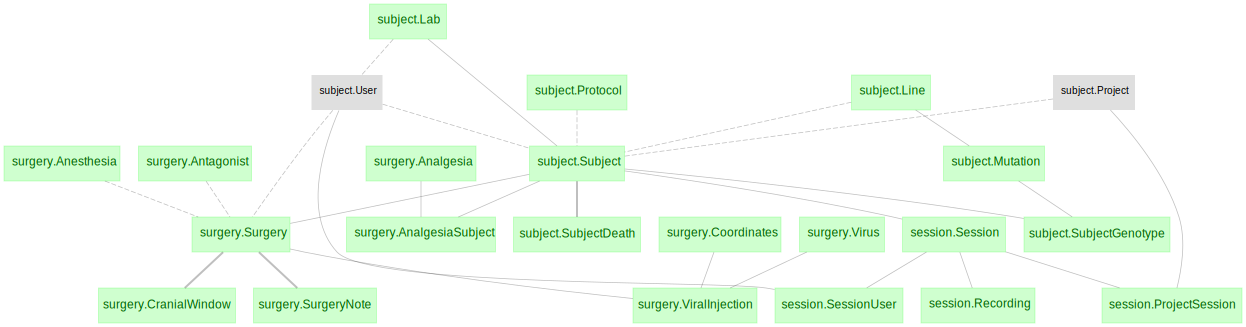

In [7]:
dj.ERD(subject.schema)

### Insert Animal Data

In [7]:
# Insert Laboratories
lab = subject.Lab()
lab_data = [
    ('Rose',
    'AG Rose, Circuit mechanisms of behavior',
    'Institute for Experimental Epileptology and Cognition Research',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET'),
    ('Gm',
    'AG Gründemann, Informationsverarbeitung neuronaler Schaltkreise',
    'DZNE',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET'),
    ('Fm',
    'AG Fuhrmann, Neuroimmunologie und Bildgebung',
    'DZNE',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET'),
    ('Beck',
    'AG Beck, Experimental Epileptology and Cognition Research',
    'Institute for Experimental Epileptology and Cognition Research',
    'Venusberg-Campus 1, 53127, Bonn',
    'CET')
]

lab.insert(lab_data, skip_duplicates=True)
lab

lab short lab name,lab_name,institution,address,time_zone
Beck,"AG Beck, Experimental Epileptology and Cognition Research",Institute for Experimental Epileptology and Cognition Research,"Venusberg-Campus 1, 53127, Bonn",CET
Fm,"AG Fuhrmann, Neuroimmunologie und Bildgebung",DZNE,"Venusberg-Campus 1, 53127, Bonn",CET
Gm,"AG Gründemann, Informationsverarbeitung neuronaler Schaltkreise",DZNE,"Venusberg-Campus 1, 53127, Bonn",CET
Rose,"AG Rose, Circuit mechanisms of behavior",Institute for Experimental Epileptology and Cognition Research,"Venusberg-Campus 1, 53127, Bonn",CET


In [8]:
# Insert line
line = subject.Line()
line_data = [("SST-IRES-Cre", "The SST-IRES-Cre Mouse Line is Daniels favorite mouse line", "wt/tg", True),
             ("VGluT3-Cre", "", "tg/tg", True),
             ("VGluT2-Cre", "", "", True),
             ("SST-IRES-Cre/VGluT3-Cre", "", "", True)
             ]
line.insert(line_data, skip_duplicates=True)
line

line,line_description,target_genotype,is_active
SST-IRES-Cre,The SST-IRES-Cre Mouse Line is Daniels favorite mouse line,wt/tg,1
SST-IRES-Cre/VGluT3-Cre,,,1
VGluT2-Cre,,,1
VGluT3-Cre,,tg/tg,1


In [9]:
# Define mouse line mutations
mutation = subject.Mutation()
mutation_data = [("SST-IRES-Cre", "Ssttm2.1(cre)Zjh", "The Sst-IRES-Cre knock-in allele (or SOM-IRES-Cre) was designed by Dr. Z. Josh Huang (Cold Spring Harbor Laboratory). A targeting vector was designed to insert an internal ribosome entry site (IRES), a Cre recombinase sequence, a polyA sequence, and an frt-flanked neo cassette into the 3' untranslated region (after the translational termination site) of the somatostatin locus (Sst or SOM) on chromosome 16."),
                 ("VGluT3-Cre", "Tg(Slc17a8-icre)1Edw", "The C57BL/6 mouse bacterial artificial chromosome (BAC) RP24-88H21, containing the entire Slc17a8 locus only, was modified by targeting a codon optimized cre recombinase (iCre), followed by an SV40 polyA signal, into the ATG start site of the Slc17a8 locus. The modified BAC was microinjected into fertilized FVB/N oocytes and transgenic founders were obtained. "),
                 ("VGluT2-Cre", "Slc17a6tm2(cre)Lowl/J", ''),
                 ("SST-IRES-Cre/VGluT3-Cre", "Ssttm2.1(cre)Zjh", ''),
                 ("SST-IRES-Cre/VGluT3-Cre", "Tg(Slc17a8-icre)1Edw", '')
                ]
mutation.insert(mutation_data, skip_duplicates=True)
mutation

line,mutation,description
SST-IRES-Cre,Ssttm2.1(cre)Zjh,"The Sst-IRES-Cre knock-in allele (or SOM-IRES-Cre) was designed by Dr. Z. Josh Huang (Cold Spring Harbor Laboratory). A targeting vector was designed to insert an internal ribosome entry site (IRES), a Cre recombinase sequence, a polyA sequence, and an frt-flanked neo cassette into the 3' untranslated region (after the translational termination site) of the somatostatin locus (Sst or SOM) on chromosome 16."
SST-IRES-Cre/VGluT3-Cre,Ssttm2.1(cre)Zjh,
SST-IRES-Cre/VGluT3-Cre,Tg(Slc17a8-icre)1Edw,
VGluT2-Cre,Slc17a6tm2(cre)Lowl/J,
VGluT3-Cre,Tg(Slc17a8-icre)1Edw,"The C57BL/6 mouse bacterial artificial chromosome (BAC) RP24-88H21, containing the entire Slc17a8 locus only, was modified by targeting a codon optimized cre recombinase (iCre), followed by an SV40 polyA signal, into the ATG start site of the Slc17a8 locus. The modified BAC was microinjected into fertilized FVB/N oocytes and transgenic founders were obtained."


In [10]:
# Insert user
user = subject.User()
user.insert1(("dmk",
             "Rose"))
user

user,lab short lab name
dmk,Rose


In [11]:
# Insert Protocol
protocol = subject.Protocol()
protocol.insert1(("LANUF2",
                 "Basic Animal Protocol"))
protocol

protocol,protocol_description
LANUF2,Basic Animal Protocol


In [12]:
# Insert Project
project = subject.Project()
project.insert1(("TEC",
                 "FM"))
project

project,project_description
TEC,FM


In [13]:
# Insert Subjects
animal = subject.Subject()
subject_data = [
    ('ROS-0001', 'Rose', 'G114', 'M', '2020-08-13', '', 'SST-IRES-Cre', 'dmk', "TEC", "LANUF2"),
    ('ROS-0002', 'Beck', 'G110', 'M', '2021-08-13', '', 'SST-IRES-Cre', 'dmk', "TEC", "LANUF2"),
    ('ROS-0003', 'Rose', 'G111', 'M', '2020-08-13', '', 'SST-IRES-Cre/VGluT3-Cre', 'dmk', "TEC", "LANUF2")
]
animal.insert(subject_data, skip_duplicates=True)
animal

subject,lab short lab name,lab_id,sex,birth_date,subject_description,line,user,project,protocol
ROS-0001,Rose,G114,M,2020-08-13,,SST-IRES-Cre,dmk,TEC,LANUF2
ROS-0002,Beck,G110,M,2021-08-13,,SST-IRES-Cre,dmk,TEC,LANUF2
ROS-0003,Rose,G111,M,2020-08-13,,SST-IRES-Cre/VGluT3-Cre,dmk,TEC,LANUF2


In [14]:
# Insert subject genotype
genotype = subject.SubjectGenotype()
genotype_data = [
    ('ROS-0001', 'Rose', 'SST-IRES-Cre', 'Ssttm2.1(cre)Zjh', 'wt/tg'),
    ('ROS-0002', 'Beck', 'SST-IRES-Cre', 'Ssttm2.1(cre)Zjh', 'wt/wt'),
    ('ROS-0003', 'Rose', 'SST-IRES-Cre/VGluT3-Cre', 'Ssttm2.1(cre)Zjh', 'wt/tg'),
    ('ROS-0003', 'Rose', 'SST-IRES-Cre/VGluT3-Cre', 'Tg(Slc17a8-icre)1Edw', 'wt/wt')
]
genotype.insert(genotype_data, skip_duplicates=True)
genotype

subject,lab short lab name,line,mutation,genotype
ROS-0001,Rose,SST-IRES-Cre,Ssttm2.1(cre)Zjh,wt/tg
ROS-0002,Beck,SST-IRES-Cre,Ssttm2.1(cre)Zjh,wt/wt
ROS-0003,Rose,SST-IRES-Cre/VGluT3-Cre,Ssttm2.1(cre)Zjh,wt/tg
ROS-0003,Rose,SST-IRES-Cre/VGluT3-Cre,Tg(Slc17a8-icre)1Edw,wt/wt


In [15]:
# Record subject death
animal = subject.SubjectDeath()
animal.insert1(('ROS-0001', 'Rose', '2021-10-10', 'Perfusion'))
animal

subject,lab short lab name,death_date death date,cause
ROS-0001,Rose,2021-10-10,Perfusion


### Insert Surgery Data

In [16]:
# Create dummy records for our viruses
virus = surgery.Virus()
virus_data = [
    ('GCamp8s', 'AAV1', 'pGP-AAV-syn-jGCaMP8s-WPRE (AAV1)'),
    ('jRGECO1a', 'AAV1', 'pAAV.CAG.Flex.NES-jRGECO1a.WPRE.SV40 (AAV1)')
]
virus.insert(virus_data, skip_duplicates=True)
virus

name,serotype,long_name
GCamp8s,AAV1,pGP-AAV-syn-jGCaMP8s-WPRE (AAV1)
jRGECO1a,AAV1,pAAV.CAG.Flex.NES-jRGECO1a.WPRE.SV40 (AAV1)


In [17]:
# Create dummy anesthesia
anesthesia = surgery.Anesthesia()
anesthesia_data = [
    ('FMM', 'Fenanyl/Midalozam/Medetomidin'),
]
anesthesia.insert(anesthesia_data, skip_duplicates=True)
anesthesia

anesthesia,long_name
FMM,Fenanyl/Midalozam/Medetomidin


In [18]:
# Create dummy anesthesia
analgesia = surgery.Analgesia()
analgesia_data = [
    ('Ketoprofen', 'Ketoprofen'),
]
analgesia.insert(analgesia_data, skip_duplicates=True)
analgesia

analgesia,long_name
Ketoprofen,Ketoprofen


In [19]:
# Create dummy anesthesia
antagonist = surgery.Antagonist()
antagonist_data = [
    ('NFA', 'Naloxon/Flumayenil/Atipamezol'),
]
antagonist.insert(antagonist_data, skip_duplicates=True)
antagonist

antagonist,long_name
NFA,Naloxon/Flumayenil/Atipamezol


In [20]:
# Create dummy coordinates
coordinates = surgery.Coordinates()
coordinates_data = [
    ('CA3VR', -0.23, -0.17, -0.24, 'Injection into ventral CA3 in right hemisphere.'),
    ('CA3VL', -0.23, 0.17, -0.24, 'Injection into ventral CA3 in right hemisphere.')
]
coordinates.insert(coordinates_data, skip_duplicates=True)
coordinates

location,x_coordinate in mm,y_coordinate in mm,z_coordinate in mm,description
CA3VL,-0.23,0.17,-0.24,Injection into ventral CA3 in right hemisphere.
CA3VR,-0.23,-0.17,-0.24,Injection into ventral CA3 in right hemisphere.


In [21]:
# Perform a surgery with two viral injections followed by a cranial window
sur = surgery.Surgery()
# Add the surgery
sur.insert1(('ROS-0001', 'Rose', '21-10-12', 23, 'dmk', 'FMM', '12:40', 500, 'NFA', '13:20', 500))

# Add the viral injections
vi = surgery.ViralInjection()
vi.insert1(('ROS-0001', 'Rose', '21-10-12', 'GCamp8s', 'AAV1', 'CA3VR', '13:30', 500))  # Inject GCamp8s into the right ventral CA3
vi.insert1(('ROS-0001', 'Rose', '21-10-12', 'jRGECO1a', 'AAV1', 'CA3VL', '14:00', 500))  # Inject JRGECO into the right ventral CA3

# Add cranial window
cw = surgery.CranialWindow()
cw.insert1(('ROS-0001', 'Rose', '21-10-12', '14:30'))  # Apply cranial window

# Give analgesia
ag = surgery.AnalgesiaSubject()
ag.insert1(('Ketoprofen', 'ROS-0001', 'Rose', '21-10-12 12:55'))  # Analgesia before surgery
ag.insert1(('Ketoprofen', 'ROS-0001', 'Rose', '21-10-12 15:00'))  # Analgesia after surgery
ag.insert1(('Ketoprofen', 'ROS-0001', 'Rose', '21-10-13 15:00'))  # Analgesia day after surgery
ag.insert1(('Ketoprofen', 'ROS-0001', 'Rose', '21-10-14 15:00'))  # Analgesia second day after surgery
ag.insert1(('Ketoprofen', 'ROS-0001', 'Rose', '21-10-15 15:00'))  # Analgesia third day after surgery
sur

# Add a surgery note
sn = surgery.SurgeryNote()
sn.insert1(('ROS-0001', 'Rose', '21-10-12',
            'The surgery went exceeedingly well. Absolutely nothing went wrong. It could not have gone better and I am' +
            'extemely happy with the way it went. The mouse woke up and is in excellent condition. I hope all my surgeries' +
            'will be like this one.'))

In [22]:
vi

subject,lab short lab name,date,name,serotype,location,datetime,volume in ul
ROS-0001,Rose,2021-10-12,GCamp8s,AAV1,CA3VR,13:30:00,500.0
ROS-0001,Rose,2021-10-12,jRGECO1a,AAV1,CA3VL,14:00:00,500.0


In [23]:
cw

subject,lab short lab name,date,time
ROS-0001,Rose,2021-10-12,14:30:00


In [24]:
ag

analgesia,subject,lab short lab name,datetime
Ketoprofen,ROS-0001,Rose,2021-10-12 12:55:00
Ketoprofen,ROS-0001,Rose,2021-10-12 15:00:00
Ketoprofen,ROS-0001,Rose,2021-10-13 15:00:00
Ketoprofen,ROS-0001,Rose,2021-10-14 15:00:00
Ketoprofen,ROS-0001,Rose,2021-10-15 15:00:00


In [25]:
sn

subject,lab short lab name,date,note
ROS-0001,Rose,2021-10-12,The surgery went exceeedingly well. Absolutely nothing went wrong. It could not have gone better and I amextemely happy with the way it went. The mouse woke up and is in excellent condition. I hope all my surgerieswill be like this one.


In [26]:
animal

subject,lab short lab name,death_date death date,cause
ROS-0001,Rose,2021-10-10,Perfusion
